In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("AAPL.csv") # reading the data
dataset.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
print(dataset.shape)
print(dataset.isnull().sum()) 

(1258, 15)
Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


In [4]:
y_label = dataset["close"]    # data to be predicted
y_label.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

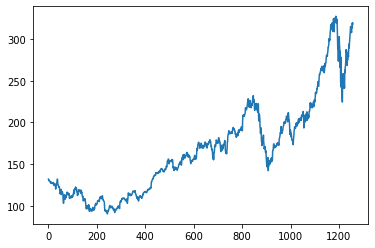

In [5]:
# plotting the price 

import matplotlib.pyplot as plt
plt.plot(y_label)

In [6]:
# scaling the data betweeen 0 and 1 using min-max scaler

import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
y = scaler.fit_transform(np.array(y_label).reshape(-1, 1))
y

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [7]:
# getting the train and test data

training_size = int(len(y)*0.65)
testing_size = len(y) - training_size
train_data, test_data = y[0:training_size, :], y[training_size:len(y), :]

In [8]:
print(train_data[:10])
print(test_data[:10])
train_data.shape, test_data.shape

[[0.17607447]
 [0.17495567]
 [0.16862282]
 [0.1696994 ]
 [0.16727181]
 [0.16794731]
 [0.16473866]
 [0.16174111]
 [0.1581525 ]
 [0.15654817]]
[[0.52651355]
 [0.52837119]
 [0.53119986]
 [0.53871485]
 [0.5461454 ]
 [0.55999324]
 [0.56864815]
 [0.57962509]
 [0.58270708]
 [0.57641645]]


((817, 1), (441, 1))

In [9]:
# function to split data into train and test
# In this project we will take time_step = 100, so inputs are -> 0, 1, 2, ...., 99 and 100th element will be output

def train_test(input_dataset, time_step):
  x_dataset, y_dataset = [], []
  for i in range(len(input_dataset) - time_step):
    data = input_dataset[i:i+time_step, 0]
    x_dataset.append(data)
    data_1 = input_dataset[i+time_step, 0]
    y_dataset.append(data_1)
  return np.array(x_dataset), np.array(y_dataset)

In [10]:
# splitting the dataset into train and test

x_train, y_train = train_test(train_data, 100)
x_test, y_test = train_test(test_data, 100)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((717, 100), (717,), (341, 100), (341,))

In [12]:
# reshaping the x_train and x_test to give these data to LSTM model

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [13]:
x_train.shape, x_test.shape

((717, 100, 1), (341, 100, 1))

In [14]:
# libraries to make the model 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
# building the Long Short-Term Memory model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
# training the model 

model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 38s 1s/step - loss: 0.0177 - val_loss: 0.0478
Epoch 2/100
12/12 [==============================] - 8s 676ms/step - loss: 0.0035 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 8s 659ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 4/100
12/12 [==============================] - 8s 654ms/step - loss: 9.1155e-04 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 8s 689ms/step - loss: 6.7657e-04 - val_loss: 0.0053
Epoch 6/100
12/12 [==============================] - 7s 607ms/step - loss: 6.5796e-04 - val_loss: 0.0043
Epoch 7/100
12/12 [==============================] - 7s 630ms/step - loss: 5.9269e-04 - val_loss: 0.0035
Epoch 8/100
12/12 [==============================] - 7s 590ms/step - loss: 6.1276e-04 - val_loss: 0.0035
Epoch 9/100
12/12 [==============================] - 7s 614ms/step - loss: 6.2509e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 7s 607ms/step -

In [18]:
# predicting the data

train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 1s 109ms/step


In [19]:
train_predict[:10]

array([[0.09189026],
       [0.09120362],
       [0.09082963],
       [0.092321  ],
       [0.09518316],
       [0.0995771 ],
       [0.10689601],
       [0.11246979],
       [0.11417129],
       [0.11602081]], dtype=float32)

In [20]:
test_predict[:10]

array([[0.2752811 ],
       [0.27584308],
       [0.2787811 ],
       [0.2832668 ],
       [0.28344384],
       [0.28062013],
       [0.2757174 ],
       [0.27633902],
       [0.27971125],
       [0.28151056]], dtype=float32)

In [21]:
##Transform back to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [22]:
train_predict[:10]

array([[112.105125],
       [111.94249 ],
       [111.853905],
       [112.20715 ],
       [112.88508 ],
       [113.92583 ],
       [115.659386],
       [116.97959 ],
       [117.38261 ],
       [117.820694]], dtype=float32)

In [23]:
test_predict[:10]

array([[155.54309],
       [155.6762 ],
       [156.37209],
       [157.43459],
       [157.47652],
       [156.8077 ],
       [155.64642],
       [155.79367],
       [156.5924 ],
       [157.0186 ]], dtype=float32)

In [24]:
import math
from sklearn.metrics import mean_squared_error

# finding the mean squared error for training data
math.sqrt(mean_squared_error(y_train, train_predict))

142.49042574788783

In [25]:
# finding the mean squared error for testing data

math.sqrt(mean_squared_error(y_test, test_predict))

239.34122849950163

In [26]:
# preparing the predicted training data for plotting 

look_back = 100
train_predict_plot = np.empty_like(y)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

In [27]:
train_predict_plot[95:110]

array([[         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [112.10512543],
       [111.94248962],
       [111.85390472],
       [112.20715332],
       [112.88507843],
       [113.92582703],
       [115.65938568],
       [116.97959137],
       [117.38260651],
       [117.82069397]])

In [28]:
# preparing the test data for plotting 

test_predict_plot = np.empty_like(y)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict) + (look_back*2):len(y), :] = test_predict

In [29]:
test_predict_plot[915:940]

array([[         nan],
       [         nan],
       [155.54309082],
       [155.67619324],
       [156.37208557],
       [157.43458557],
       [157.47651672],
       [156.80769348],
       [155.64642334],
       [155.79367065],
       [156.59240723],
       [157.01860046],
       [159.61355591],
       [163.53382874],
       [166.99783325],
       [170.16044617],
       [173.04949951],
       [174.92559814],
       [174.60557556],
       [172.82722473],
       [170.62808228],
       [169.42123413],
       [169.14060974],
       [169.64004517],
       [170.33462524]])

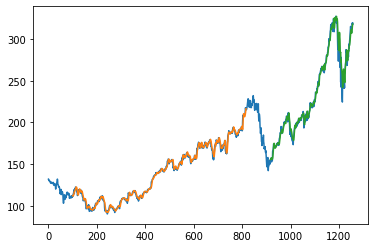

In [30]:
# plotting
import matplotlib.pyplot as plt

plt.plot(scaler.inverse_transform(y))    # representing blue line
plt.plot(train_predict_plot)             # representing orange line
plt.plot(test_predict_plot)              # representing green line
plt.show()

## ***`30 days prediction`***

In [31]:
# getting the last 100 price data points from the test data 

x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
# list containing the last 100 price data

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
# predicting the next 30 day's stock market price 

x_input_copy = x_input
prediction_output = []     # list to contain the predicted values 
i = 0

# here we will predict next data using previous 100 price data of temp_input which we got in above cell 
# then we insert the predicted value in the temp_input list and will use last 100 data points for future prediction
# we keep doing this procedure for 30 prediction
# So for 30th prediction input indexs are ---> {29, 30, 31, 32, 33, 34, ........, 127, 128} and output index is 129
  

while(i<30):
  if(len(temp_input)>100):
    input_data = np.array(temp_input[1:])
    input_data=input_data.reshape(1,-1)
    input_data = input_data.reshape(1, look_back, 1)
    predicted_value = model.predict(input_data, verbose = 0)
    prediction_output.append(predicted_value[0].tolist())
    temp_input.extend(predicted_value[0].tolist())
    temp_input=temp_input[1:]
    x_input_copy = np.append(x_input_copy, predicted_value.tolist())
    i = i+1
  else:
    input_data = x_input_copy.reshape(1, look_back, 1)
    predicted_value = model.predict(input_data, verbose = 0)
    prediction_output.append(predicted_value[0].tolist())
    temp_input.extend(predicted_value[0].tolist())
    x_input_copy = np.append(x_input_copy, predicted_value.tolist())
    i = i+1

In [34]:
len(prediction_output), x_input_copy.shape

(30, (130,))

In [35]:
prediction_output

[[0.9625177383422852],
 [0.9627159237861633],
 [0.9627204537391663],
 [0.9634186625480652],
 [0.9650429487228394],
 [0.9675546288490295],
 [0.9707825779914856],
 [0.9744958877563477],
 [0.9784612655639648],
 [0.9824873805046082],
 [0.9864486455917358],
 [0.9902874231338501],
 [0.9940049052238464],
 [0.9976392984390259],
 [1.0012478828430176],
 [1.004886507987976],
 [1.0085980892181396],
 [1.0124057531356812],
 [1.0163121223449707],
 [1.0203044414520264],
 [1.0243580341339111],
 [1.0284457206726074],
 [1.0325406789779663],
 [1.0366214513778687],
 [1.0406734943389893],
 [1.04468834400177],
 [1.0486640930175781],
 [1.052601933479309],
 [1.0565049648284912],
 [1.0603761672973633]]

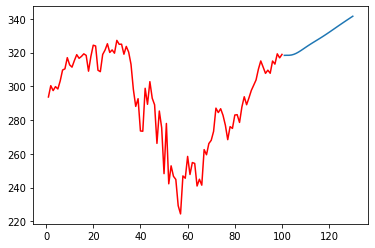

In [36]:
# plotting the predicted price with some prices

begin = np.arange(1, 101)
end = np.arange(101, 131)
plt.plot(begin, scaler.inverse_transform(y[1158:]), c = 'r')
plt.plot(end, scaler.inverse_transform(prediction_output))
plt.show()

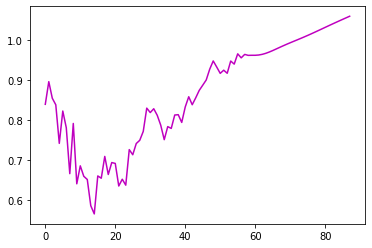

In [37]:
# plotting the predicted price with some previous prices 

new_y = y.tolist()
new_y.extend(prediction_output)
plt.plot(new_y[1200:], c = "m")

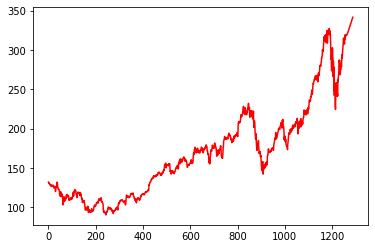

In [38]:
# graph of all prices (given and predicted prices)

new_y = scaler.inverse_transform(new_y).tolist()
plt.plot(new_y, c = "r")